# My first notebook in VS Code!

If matplotlib.pyplot wasn't found try
```bash
pip3 install matplotlib
```

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

In [11]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

assert(train_data[0][0:4] == [1, 14, 22, 16])     # Check the first four number 
assert(train_data[0][-2:]  == [178, 32])          # Check the last two numbers

print(max([max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# print(reverse_word_index)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

# print(decoded_review)


9999


In [13]:

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Listing 4.4 Model definition

In [46]:
import tensorflow as tf

from tensorflow import keras
from keras import layers

print("Tensorflow version: " + tf.__version__)


model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="tanh")
])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)


Tensorflow version: 2.10.0


In [47]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [48]:
# Fitting and obtaining a history object
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6814 - accuracy: 0.6869 - val_loss: 0.4110 - val_accuracy: 0.8298
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3292 - accuracy: 0.8866 - val_loss: 0.4022 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2520 - accuracy: 0.9189 - val_loss: 0.3619 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2018 - accuracy: 0.9397 - val_loss: 0.3702 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1642 - accuracy: 0.9545 - val_loss: 0.4652 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1334 - accuracy: 0.9668 - val_loss: 0.4201 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1122 - accuracy: 0.9740 - val_loss: 0.4743 - val_accuracy: 0.8807
Epoch 8/20
30

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Listing 4.8 Plotting the training and validation loss

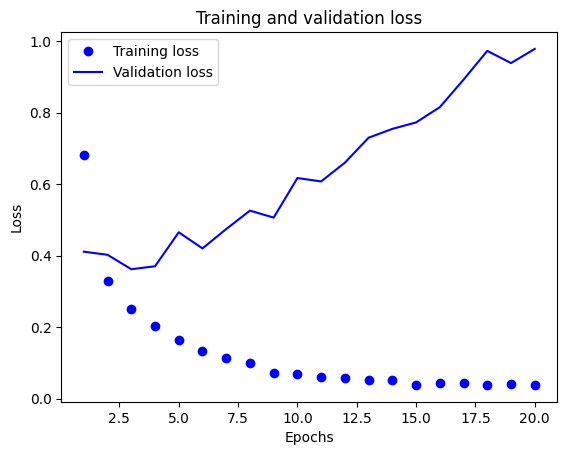

In [50]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Listing 4.9 Plotting the training and validation accuracy

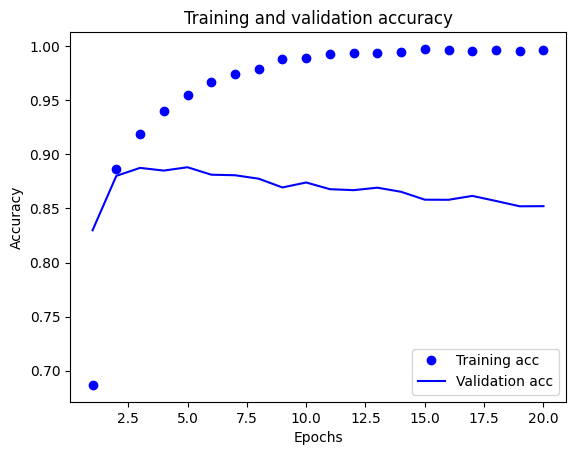

In [51]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Listing 4.10 Retraining a model from scratch

In [40]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4367 - accuracy: 0.8250
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2524 - accuracy: 0.9111
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1996 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3118 - accuracy: 0.8775


Final results for test loss & test accuracy

In [41]:
results

[0.3117922246456146, 0.8774799704551697]

In [42]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.2676237 ],
       [0.99996847],
       [0.9700301 ],
       ...,
       [0.17286575],
       [0.0763062 ],
       [0.6990124 ]], dtype=float32)